In [1]:
import cartopy

In [2]:
import xarray as xr
import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
sys.path.insert(0,"/home/albert/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import cmocean
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sys.path.insert(0,"/home/albert/lib/python/w_k_scripts")
import Wavenum_freq_spec_func as wfs

/home/albert/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
gridfile="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-I/mesh_mask_eNATL60_3.6.nc"
dsgrid=xr.open_mfdataset(gridfile)
ff=dsgrid['ff']

In [4]:
## Dataset

dirtide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/"
dirnotide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/"



In [5]:
filesUtide="eNATL60ACO-BLBT02_1h_*_gridU-2D_*.nc"
filesVtide="eNATL60ACO-BLBT02_1h_*_gridV-2D_*.nc"

tfilesUtide=dirtide+filesUtide
tfilesVtide=dirtide+filesVtide

filesUnotide="eNATL60ACO-BLB002_1h_*_gridU-2D_*.nc"
filesVnotide="eNATL60ACO-BLB002_1h_*_gridV-2D_*.nc"

tfilesUnotide=dirnotide+filesUnotide
tfilesVnotide=dirnotide+filesVnotide


In [6]:
fUtide = xr.open_mfdataset(tfilesUtide)
Utide=fUtide['sozocrtx'][:]
navlat= fUtide['nav_lat']
navlon= fUtide['nav_lon']

fUnotide = xr.open_mfdataset(tfilesUnotide)
Unotide=fUnotide['sozocrtx'][:]

fVtide = xr.open_mfdataset(tfilesVtide)
Vtide=fVtide['somecrty'][:]

fVnotide = xr.open_mfdataset(tfilesVnotide)
Vnotide=fVnotide['somecrty'][:]


In [7]:
T=2*np.pi/(1E-4)

In [8]:
print T

62831.8530718


In [9]:
wutide=Utide.window
wutide.set(n=30,dim='time_counter', cutoff=T)
Utidefilt=wutide.convolve()

In [13]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


In [14]:

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]


In [15]:
ii=(imin+imax)/2
jj=(jmin+jmax)/2

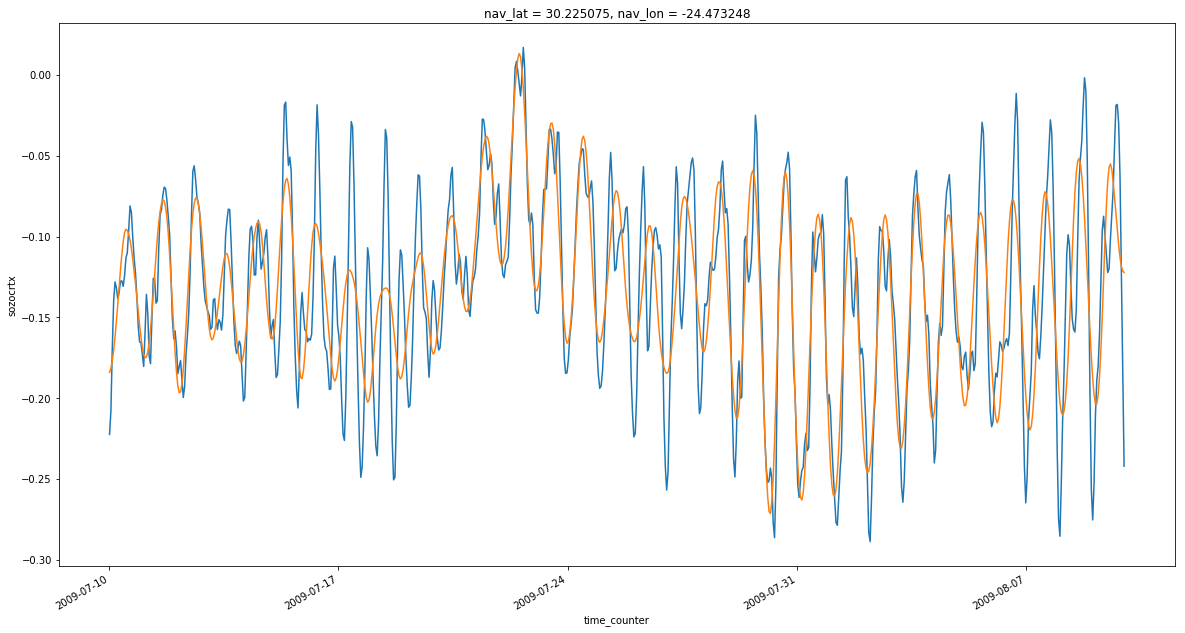

In [19]:
fig=plt.figure(figsize=(20,10))
Utide.isel(y=ii, x=jj).plot()
Utidefilt.isel(y=ii, x=jj).plot(label='filt')

In [23]:
wutide=Utide.window
wutide.set(n=70,dim='time_counter', cutoff=T)
Utidefilt=wutide.convolve()


ValueError: The overlapping depth 35 is larger than your
smallest chunk size 24. Rechunk your array
with a larger chunk size or a chunk size that
more evenly divides the shape of your array.

In [ ]:
fig=plt.figure(figsize=(20,10))
Utide.isel(y=ii, x=jj).plot()
Utidefilt.isel(y=ii, x=jj).plot(label='filt')